# IST 691 Deep Learning in Practice

**Homework 2**

Name: Bryan Crigger

SUID: 255676562

*Save this notebook into your Google Drive. The notebook has appropriate comments at the top of code cells to indicate whether you need to modify them or not. Answer your questions directly in the notebook. Remember to use the GPU as your runtime. Once finished, run ensure all code blocks are run, download the notebook and submit through Blackboard.*

### Q1

Explain the differences between convolutional neural networks and a multi-layer perceptron. Explain whether the following statement is true, and if true, when it could be true.

'An MLP can represent the same functions as a CNN.'

*A Multi-Layered Perceptron (MLP) would need to be much more complex and have more parameters to end up getting the same performance of a CNN, which seems to be the reason why CNNs came about. MLPs is a NN where all the layers are fully connected, which an result in an exponential increase in the number of parameters that the MLP model has. CNNs on the other hand have different layer components that don't require each layer to be fully connected, cutting down on the number of parameters that might be required.*

### Q2

In class, we saw an example of autoencoders being able to remove the noise of an image. Explain why this happens and what the limits of such funcionality are.

*Autoencoders are able to remove noise from images because it is trained on images and creates the "code", which is a distilled/condensed representation of the images, such that when the decoder is generating the image from the "code" it has a good understanding of what the image should look like, and therefore remove the noise. Some limitations of autoencoders in regards to denoising an image is that the autoencoder would need a lot of data to train on the more complex and noisey the data are. Similarly, since the autoencoder is learning a condensed representation of what the data is, trying to use it on data that is much different than what it was trained on might not produce good accuracy.*

### Q3

When using transfer learning models, sometimes we get better results by fine-tuning, and some other times we get better results by freezing the parameters before training. Under what circumstances should we fine-tune the model in order to get a better result? And, under what circumstances should we freeze the parameters instead?

*With transfer learning determining the number of layers to freeze seems to be correlated with how similar the data is that you are wanting to train the model on is to the data on which the model was originally trained. The more similar the new dataset is to the dataset the model was trained on the fewer layers that are required to freeze to get good accuracy. Since determining the number of layers to freeze for transfer is not an exact science, a good rule of thumb is to start with freezing as few layers as possible that will result in accurate enough results. A few reasons for this is so that you are still taking advantage of the purpose of transfer learning (not needing to build and train a full model from scratch) and to avoid over-fitting the data.*

### Q4: MLP vs CNN

Below, there are two neural networks for classifying MNIST digits: `model_mlp`  is an MLP with no hidden layers (the smallest possible) and 7,850 parameters. Evaluate the performance of this model below.

Then, define a convolutional neural network with similar a number of parameters and evaluate its performance. Can it do better? Why?

In [1]:
# DO NOT MODIFY THIS CELL

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_mlp = keras.Sequential(
    [
        keras.Input(shape = input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model_mlp.summary()

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [2]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_mlp.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_mlp.fit(x_train,
              y_train,
              batch_size = batch_size,
              epochs = epochs,
              validation_split = 0.1,
              verbose = 1)

Epoch 1/15
422/422 [==============================] - 8s 6ms/step - loss: 0.7220 - accuracy: 0.8212 - val_loss: 0.3552 - val_accuracy: 0.9115
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.3797 - accuracy: 0.8991 - val_loss: 0.2861 - val_accuracy: 0.9252
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3326 - accuracy: 0.9091 - val_loss: 0.2627 - val_accuracy: 0.9292
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3107 - accuracy: 0.9144 - val_loss: 0.2489 - val_accuracy: 0.9333
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2975 - accuracy: 0.9171 - val_loss: 0.2426 - val_accuracy: 0.9347
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2892 - accuracy: 0.9199 - val_loss: 0.2377 - val_accuracy: 0.9357
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.9212 - val_loss: 0.2333 - val_accuracy: 0.9372
Epoch 

In [3]:
# DO NOT MODIFY CELL
score = model_mlp.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26485952734947205
Test accuracy: 0.9258000254631042


In [37]:
# DEFINE YOUR OWN CNN SO THAT THE PARAMETERS ARE FEWER THAN THE MLP
model_cnn = models.Sequential(
    [
        layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation = 'softmax'),
    ]
)

model_cnn.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 8)         0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 400)               0         
                                                                 
 dense_22 (Dense)            (None, 10)              

In [38]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_cnn.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 5s 6ms/step - loss: 0.4754 - accuracy: 0.8714 - val_loss: 0.1167 - val_accuracy: 0.9698
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1236 - accuracy: 0.9629 - val_loss: 0.0840 - val_accuracy: 0.9780
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0927 - accuracy: 0.9716 - val_loss: 0.0764 - val_accuracy: 0.9795
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0778 - accuracy: 0.9761 - val_loss: 0.0676 - val_accuracy: 0.9808
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0676 - accuracy: 0.9793 - val_loss: 0.0609 - val_accuracy: 0.9823
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0566 - val_accuracy: 0.9852
Epoch 7/15
422/422 [==============================] - 2s 6ms/step - loss: 0.0570 - accuracy: 0.9827 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 

In [39]:
# DO NOT MODIFY CELL
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0404512844979763
Test accuracy: 0.9861000180244446


**Did the CNN do better than the MLP? Why or why not?**

*Yes, the CNN did quite a bit better, improving from the MLP having a 92.6% accuracy to 98.6% accuracy that the CNN model had.*

### Q5: Transfer learning

We are going to classify beans using transfer learning (read more about the dataset [here](https://www.tensorflow.org/datasets/catalog/beans). In the code below, use the `ResNet50` model available in Keras to classify the beans dataset (3 classes). **Do not fine tune `ResNet50`**. What is the performance?

In [5]:
# DO NOT MODIFY CELL
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    'beans',
    split = ['train[:70%]', 'train[:30%]'], # train/test split
    batch_size = -1,
    as_supervised = True  # include labels
)

# resizing images
train_ds = tf.image.resize(train_ds, (200, 200))
test_ds = tf.image.resize(test_ds, (200, 200))

# transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=3)
test_labels = to_categorical(test_labels, num_classes=3)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteVMUJF8/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteVMUJF8/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteVMUJF8/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [22]:
# IMPORT THE APPROPRIATE MODEL HERE
from tensorflow.keras.applications  import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

## loading ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)
base_model.trainable = False

## preprocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

flatten_layer = layers.Flatten()
prediction_layer = layers.Dense(3, activation = 'softmax')

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    flatten_layer,
    layers.Dropout(0.2),
    prediction_layer
])

In [23]:
# DO NOT MODIFY CELL
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)

In [24]:
# DO NOT MODIFY CELL
model.fit(train_ds, train_labels, epochs = 5, validation_split = 0.2, batch_size = 64)

Epoch 1/5
10/10 [==============================] - 8s 357ms/step - loss: 4.8557 - accuracy: 0.3489 - val_loss: 1.2134 - val_accuracy: 0.3034
Epoch 2/5
10/10 [==============================] - 2s 220ms/step - loss: 3.7534 - accuracy: 0.3333 - val_loss: 2.0989 - val_accuracy: 0.3310
Epoch 3/5
10/10 [==============================] - 2s 183ms/step - loss: 3.2143 - accuracy: 0.3420 - val_loss: 2.5754 - val_accuracy: 0.3448
Epoch 4/5
10/10 [==============================] - 2s 225ms/step - loss: 2.9476 - accuracy: 0.3903 - val_loss: 1.4119 - val_accuracy: 0.3517
Epoch 5/5
10/10 [==============================] - 2s 200ms/step - loss: 2.8158 - accuracy: 0.3351 - val_loss: 1.1178 - val_accuracy: 0.4690


In [25]:
# DO NOT MODIFY CELL
score = model.evaluate(test_ds, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1889210939407349
Test accuracy: 0.42580646276474


*The performance of the model after transfer learning without fine-tuning the model is not great. The accuracy on the test data was 42.6%, and at best 46.9% of the validation dataset. The accuracy being so low could be because we did not fine-tune the model at all, and therefore should try unfreezing at least some of the layers to see how well it would perform.*

### Q6: Autoencoder

Modify the convolutional autoencoder for MNIST we saw in class so that the embedding has the following structure:
- Conv2D: 8 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 3 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 1 filters, Kernel (3, 3)

After making this change, you need to change the input size of the decoder function so that it can accept the output of the encoder. What is the performance of your model?

In [45]:
# DO NOT MODIFY THIS CELL
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np
import h5py
from pathlib import Path
import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D
# from keras.utils import np_utils
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import h5py

# data now has a different shape
random_seed = 42
np.random.seed(random_seed)

# load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# cast the sample data to the current Keras floating-point type
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# reshape to 2D grid, one line per image
X_train = X_train.reshape(X_train.shape[0], number_of_pixels)
X_test = X_test.reshape(X_test.shape[0], number_of_pixels)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# reshape sample data to 4D tensor using channels_last convention
X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

In [62]:
# MODIFY THE ENCODER BELOW ACCORDING TO THE QUESTION REQUIREMENTS
CAE_encoder_conv_1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_pool_1 = MaxPooling2D((2,2), padding = 'same')
CAE_encoder_conv_2 = Conv2D(3, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_pool_2 = MaxPooling2D((2,2), padding = 'same')
CAE_encoder_output = Conv2D(1, (3, 3), activation = 'relu', padding = 'same')
CAE_encoder_input = Input(shape=(28, 28, 1))

In [63]:
# DO NOT MODIFY THIS CELL
CAE_decoder_up_1 = UpSampling2D((2,2))
CAE_decoder_conv_1 = Conv2D(8, (3, 3), activation = 'relu', padding = 'same')
CAE_decoder_up_2 = UpSampling2D((2,2))
CAE_decoder_output = Conv2D(1, (3, 3), activation = 'sigmoid', padding = 'same')

CAE_encoder_step_1 = CAE_encoder_conv_1(CAE_encoder_input)
CAE_encoder_step_2 = CAE_encoder_pool_1(CAE_encoder_step_1)
CAE_encoder_step_3 = CAE_encoder_conv_2(CAE_encoder_step_2)
CAE_encoder_step_4 = CAE_encoder_pool_2(CAE_encoder_step_3)
CAE_encoder_step_5 = CAE_encoder_output(CAE_encoder_step_4)

CAE_decoder_step_1 = CAE_decoder_up_1(CAE_encoder_step_5)
CAE_decoder_step_2 = CAE_decoder_conv_1(CAE_decoder_step_1)
CAE_decoder_step_3 = CAE_decoder_up_2(CAE_decoder_step_2)
CAE_decoder_step_4 = CAE_decoder_output(CAE_decoder_step_3)


Conv_AE = Model(CAE_encoder_input, CAE_decoder_step_4)
Conv_AE.compile(optimizer = 'adam', loss = 'binary_crossentropy')


Conv_AE_encoder_only_model = Model(CAE_encoder_input, CAE_encoder_step_5)

In [64]:
# MODIFY THE INPUT FOR THE DECODER BELOW ACCORDING TO THE OUTPUT EXPECTED FROM THE ENCODER
Conv_AE_decoder_only_input = Input(shape=(28, 28, 1))

In [65]:
# DO NOT MODIFY THIS CELL
Conv_AE_decoder_only_step_1 = CAE_decoder_up_1(Conv_AE_decoder_only_input)
Conv_AE_decoder_only_step_2 = CAE_decoder_conv_1(Conv_AE_decoder_only_step_1)
Conv_AE_decoder_only_step_3 = CAE_decoder_up_2(Conv_AE_decoder_only_step_2)
Conv_AE_decoder_only_step_4 = CAE_decoder_output(Conv_AE_decoder_only_step_3)

Conv_AE_decoder_only_model = Model(Conv_AE_decoder_only_input, Conv_AE_decoder_only_step_4)

In [66]:
# DO NOT MODIFY THIS CELL
# FIT AND EVALUATE PERFORMANCE
Conv_AE.fit(X_train, X_train,
               epochs = 50, batch_size = 128, shuffle = True,
               verbose = 2,
               validation_data = (X_test, X_test))

Epoch 1/50
469/469 - 5s - loss: 0.2718 - val_loss: 0.1689 - 5s/epoch - 11ms/step
Epoch 2/50
469/469 - 3s - loss: 0.1543 - val_loss: 0.1395 - 3s/epoch - 5ms/step
Epoch 3/50
469/469 - 3s - loss: 0.1335 - val_loss: 0.1279 - 3s/epoch - 6ms/step
Epoch 4/50
469/469 - 2s - loss: 0.1266 - val_loss: 0.1237 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.1241 - val_loss: 0.1222 - 2s/epoch - 5ms/step
Epoch 6/50
469/469 - 2s - loss: 0.1229 - val_loss: 0.1214 - 2s/epoch - 5ms/step
Epoch 7/50
469/469 - 2s - loss: 0.1222 - val_loss: 0.1207 - 2s/epoch - 5ms/step
Epoch 8/50
469/469 - 3s - loss: 0.1216 - val_loss: 0.1202 - 3s/epoch - 6ms/step
Epoch 9/50
469/469 - 2s - loss: 0.1211 - val_loss: 0.1196 - 2s/epoch - 5ms/step
Epoch 10/50
469/469 - 2s - loss: 0.1206 - val_loss: 0.1192 - 2s/epoch - 5ms/step
Epoch 11/50
469/469 - 2s - loss: 0.1202 - val_loss: 0.1188 - 2s/epoch - 5ms/step
Epoch 12/50
469/469 - 2s - loss: 0.1200 - val_loss: 0.1185 - 2s/epoch - 4ms/step
Epoch 13/50
469/469 - 2s - loss: 0.1

In [67]:
# DO NOT MODIFY THIS CELL
def draw_predictions_set(predictions, filename = None):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin = 0, vmax = 1, cmap = 'gray')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i + 6)
        plt.imshow(predictions[i].reshape(28, 28), vmin = 0, vmax = 1, cmap = 'gray')
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

313/313 [==============================] - 1s 2ms/step


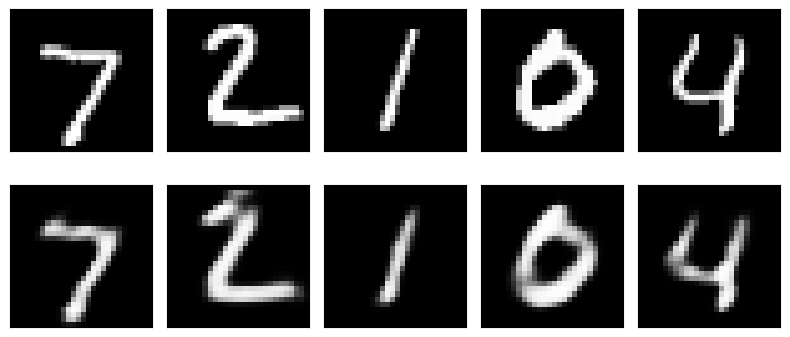

In [69]:
# Test your new predictions
Conv_predictions = Conv_AE.predict(X_test)
draw_predictions_set(Conv_predictions, 'NB3-ConvAE-predictions')

*The model looks to be doing pretty well, as the generated number predictions look very similar to the actual values.*